In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_opt(path, ls, model='powerlaw', run=''):
    
    df = pd.read_csv(path+'df'+run+'_'+model+'_kick_'+str(ls)+'.csv')
    filter_ = df['mean_reward'] == max(df['mean_reward'])
    
    if model == 'powerlaw':
        
        beta = df[filter_]['config/beta'].values[0]
        rewards = np.load(path+'rewards_'+str(beta)+'.npy')
        
        return np.mean(rewards), np.std(rewards)/np.sqrt(len(rewards)), beta 
    
    elif model == 'double_exp':
        
        par = [df[filter_]['config/d_int'].values[0], df[filter_]['config/d_ext'].values[0], df[filter_]['config/p'].values[0]]
        rewards = np.load(path+'rewards_'+str(par)+'.npy')
        
        return np.mean(rewards), np.std(rewards)/np.sqrt(len(rewards)), par 

In [ ]:
def get_policy(results_path, config, agent, episode):
    
    memories = np.load(results_path + config + '/memories_pop_'+str(agent)+'_episode_'+str(episode)+'.npy')
    num_states = len(memories[0,0,:])
    
    y = []
    for state_index in range(num_states):
        y.append(memories[ 0, 0, state_index] / np.sum(memories[0, :,state_index]))
       
    return y

In [ ]:
get_opt

In [ ]:
NUM_BINS = 3000

#get all policies
policies = np.zeros([NUM_AGENTS, NUM_BINS])
for ind, ag in enumerate(AG_LIST):
    #get policy of agent ag
    policies[ind] = get_policy(results_path, config=CONFIG, agent=ag, episode=EPISODE)

#get data for plot    
lengths = np.arange(NUM_BINS)+1
prob_allagents = np.zeros([NUM_AGENTS, len(lengths)])

for i_length, l in enumerate(lengths):
    for ind, ag in enumerate(AG_LIST):
        #get probability of performing step of length l from policy
        prob_allagents[ind, i_length] = np.prod(np.append(policies[ind,:l-1], 1-policies[ind,l-1]))
        
        



In [6]:
np.load('../data_step_distr_plot/lc_0.6/memories_pop_0_episode_69000.npy').shape

(1, 2, 3000)

In [80]:
num_agents = 10
length_policy = 3000
lengths = np.arange(length_policy)+1

# policy_pw = np.zeros((num_agents, length_policy))
prob_10_05 = np.zeros((num_agents, length_policy))
prob_10_09 = np.zeros((num_agents, length_policy))

for agent in range(num_agents):
    
    try:
        h5 = np.load(f'../data_step_distr_plot/lc_10/memories_pop_{agent}_episode_69000.npy')[0]
        h9 = np.load(f'../data_step_distr_plot/lc_10_withprior/memories_pop_{agent}_episode_69000.npy')[0]
    except:
        continue
    for idxprior, h in enumerate([h5, h9]):    
        norm = h.sum(0)
        pol = h[0]/norm
        
        if idxprior == 0:
            for i_length, l in enumerate(lengths):            
                prob_10_05[agent, i_length] = np.prod(np.append(pol[:l-1], 1-pol[l-1]))
        else:
            for i_length, l in enumerate(lengths):            
                prob_10_09[agent, i_length] = np.prod(np.append(pol[:l-1], 1-pol[l-1]))

In [79]:
num_agents = 10
length_policy = 3000
lengths = np.arange(length_policy)+1

# policy_pw = np.zeros((num_agents, length_policy))
prob_06_05 = np.zeros((num_agents, length_policy))
prob_06_09 = np.zeros((num_agents, length_policy))

for agent in range(num_agents):
    
    try:
        h5 = np.load(f'../data_step_distr_plot/lc_0.6/memories_pop_{agent}_episode_69000.npy')[0]
        h9 = np.load(f'../data_step_distr_plot/lc_0.6_withprior/memories_pop_{agent}_episode_69000.npy')[0]
    except:
        continue
    for idxprior, h in enumerate([h5, h9]):    
        norm = h.sum(0)
        pol = h[0]/norm
        
        if idxprior == 0:
            for i_length, l in enumerate(lengths):            
                prob_06_05[agent, i_length] = np.prod(np.append(pol[:l-1], 1-pol[l-1]))
        else:
            for i_length, l in enumerate(lengths):            
                prob_06_09[agent, i_length] = np.prod(np.append(pol[:l-1], 1-pol[l-1]))

In [89]:
med/np.sum(med)

array([9.83909580e-01, 2.50120089e-07, 2.83535796e-07, ...,
       2.72718271e-15, 2.69991088e-15, 2.67291177e-15])

[1e-06, 3]

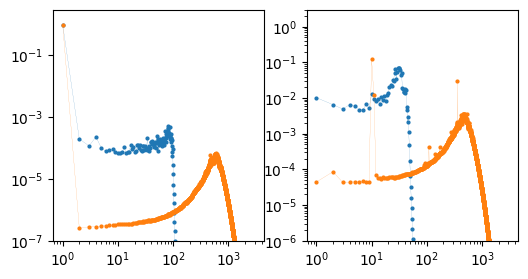

In [109]:
fig, ax = plt.subplots(1, 2, figsize = (6, 3))
l06 = 3000
for p in [prob_06_05, prob_06_09]:
    med = np.median(p, axis = 0)
    ax[0].loglog(np.arange(1, l06+1), med[:l06]/np.sum(med), '-o', ms = 2, lw = 0.1)
    # ax[0].loglog(np.arange(1, length_p+1), np.median(prob_06_09, axis = 0), '-o', ms = 2, lw = 0.1)

l10 = 3000
for p, l in zip([prob_10_05, prob_10_09], [l10, l10]):
    med = np.median(p, axis = 0)
    ax[1].loglog(np.arange(1, l+1), med[:l]/np.sum(med), '-o', ms = 2, lw = 0.1)
    
# ax[1].loglog(np.arange(1, length_np+1), np.median(prob_10_05, axis = 0), '-o', ms = 2, lw = 0.1)
# ax[1].loglog(np.arange(1, length_p+1), np.median(prob_10_09, axis = 0), '-o', ms = 2, lw = 0.1)

# plt.loglog(np.arange(1, length_policy+1), prob_pw_05[idxnoprior]/np.sum(prob_pw_05[idxnoprior]), 
#            '-o', ms = 2, lw = 0.1, alpha = 0.1, c = 'C0', zorder = -1)
# plt.loglog(np.arange(1, length_policy+1), prob_pw_09[idxprior]/np.sum(prob_pw_09[idxprior]), 
#            '-o', ms = 2, lw = 0.1, alpha = 0.1, c = 'C1', zorder = -1)

# pw = np.arange(1, length_np+1)**(-1+0.01)
# ax[1].loglog(np.arange(1, length_np+1), pw/np.sum(pw), c = 'k', zorder = -1)

plt.setp(ax[0], ylim = (1e-7, 3))
plt.setp(ax[1], ylim = (1e-6, 3))